In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Read the CSV file
df = pd.read_csv('creditcard.csv')
# Show the contents
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [ ]:
#  VISUALIZATION OF THE DATA USING THE SEABORN LIBRARY (START)

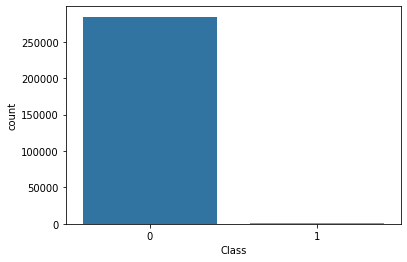

In [10]:
#  plot distribution of the target label using seaborn
sns.countplot(x='Class', data=df)

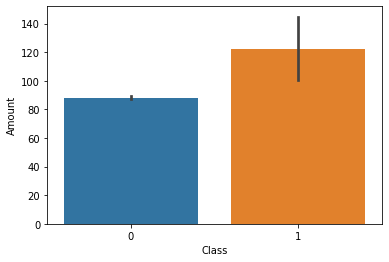

In [11]:
# display the mean value for each value in a categorical column using seaborn
sns.barplot(x='Class', y='Amount', data=df) 

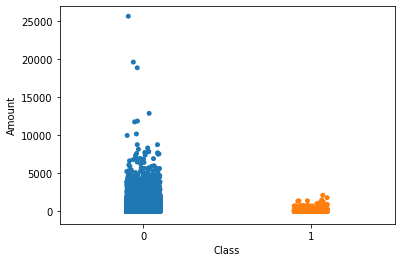

In [12]:
# strip plot draws a scatter plot where one of the variables is categorical
sns.stripplot(x='Class', y='Amount', data=df)

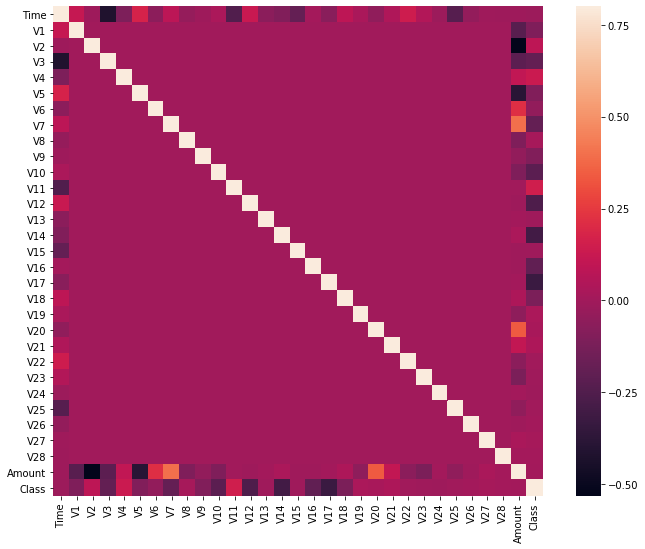

In [13]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
#  VISUALIZATION OF THE DATA USING THE SEABORN LIBRARY (END)

In [ ]:


# BUILD THE MODEL



In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

In [6]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [7]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.94      0.81      0.86    142404
weighted avg       1.00      1.00      1.00    142404

